# Scottish Haggis Data Analysis
**Author:** Pedro Fernandes

## 1. Introduction

### Description of the Dataset

This dataset contains 344 recorded sightings of the Scottish haggis which is a rare wildlife species recently discovered across three Scottish islands: Iona, Skye, and Shetland. This monitoring effort was commissioned by Lord Ramsay McCraig, a renowned Scottish wildlife pioneer, and has documented three distinct species: the **Macduff**, the **Wild Rambler**, and the **Bog Sniffler**.

Each observation includes:

- **Morphological measurements**: nose length (mm), eye size (mm), tail length (mm), and body mass (g)
- **Demographic data**: sex of the specimen
- **Temporal and geographical context**: island location and year of sighting (2023–2025)

The dataset represents a unique opportunity to understand the physical characteristics and distributions of these newly monitored species across different island ecosystems.

We will:
- Load and inspect the dataset  
- Clean missing values  
- Explore species distributions  
- Analyze numeric features  
- Visualize relationships between body size measurements 
---

## Step 1: Understanding the Dataset
Before analysing, we need to understand:
- how many rows there are
- how many columns
- what type of data each column contains
- whether there are missing values


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('scottish_haggis_2025.csv')

print("Dataset loaded successfully!")

# Inspect first 5 rows
print("First 5 rows:")
display(df.head())

Dataset loaded successfully!
First 5 rows:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [8]:
# Check data types and missing values
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [18]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [10]:
#Check for unique values in categorical columns to identify typos
print("\nUnique Species:", df['species'].unique())
print("Unique Sex:", df['sex'].unique())
print("Unique Islands:", df['island'].unique())


Unique Species: ['Macduff' 'WildRambler' 'BogSniffler']
Unique Sex: ['female' 'male' nan 'green']
Unique Islands: ['Skye' 'Iona' 'Shetland']


## Stage 1: Data Cleaning & Exploratory Data Analysis (EDA)

### Data Cleaning:
During inspection, we identified the following issues:
1.  **Missing Values**: There are a few rows missing physical measurements (`nose_length_mm`, etc.) and some missing `sex`.
2.  **Data Errors**: One record has 'green' listed as the sex, which is clearly a data entry error.

**Justification**:
* We will drop the row with 'green' sex as it is invalid. This is an impossible biological value and therefore a data entry error.
* We will drop rows with missing measurements and missing sex. These measurements are core biological traits and cannot be meaningfully imputed without introducing artificial structure into the data. Since the proportion of missing values is <5%, deletion is statistically safe.

In [59]:
# 1. Drop rows where measurements are missing
df_clean = df.dropna(subset=['nose_length_mm', 'body_mass_g'])

# 2. Fix the 'green' sex error (remove that row)
df_clean = df_clean[df_clean['sex'] != 'green']

# 3. Drop rows where sex is missing (NaN)
df_clean = df_clean.dropna(subset=['sex'])

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Verify clean
print("\nRemaining missing values:")
print(df_clean.isnull().sum())

print("\nRows removed:", len(df) - len(df_clean))


Original dataset shape: (344, 9)
Cleaned dataset shape: (333, 9)

Remaining missing values:
id                0
species           0
island            0
nose_length_mm    0
eye_size_mm       0
tail_length_mm    0
body_mass_g       0
sex               0
year              0
dtype: int64

Rows removed: 11


## Exploratory Data Analysis (EDA)
Now that the data is clean, we explore distributions, relationships, and patterns through visualization. This section guides our modeling decisions in later stages.

### Categorical Feature Distributions
We inspect the balance of our categorical variables. Imbalanced classes (e.g., if one species had very few records) could bias our classification models.

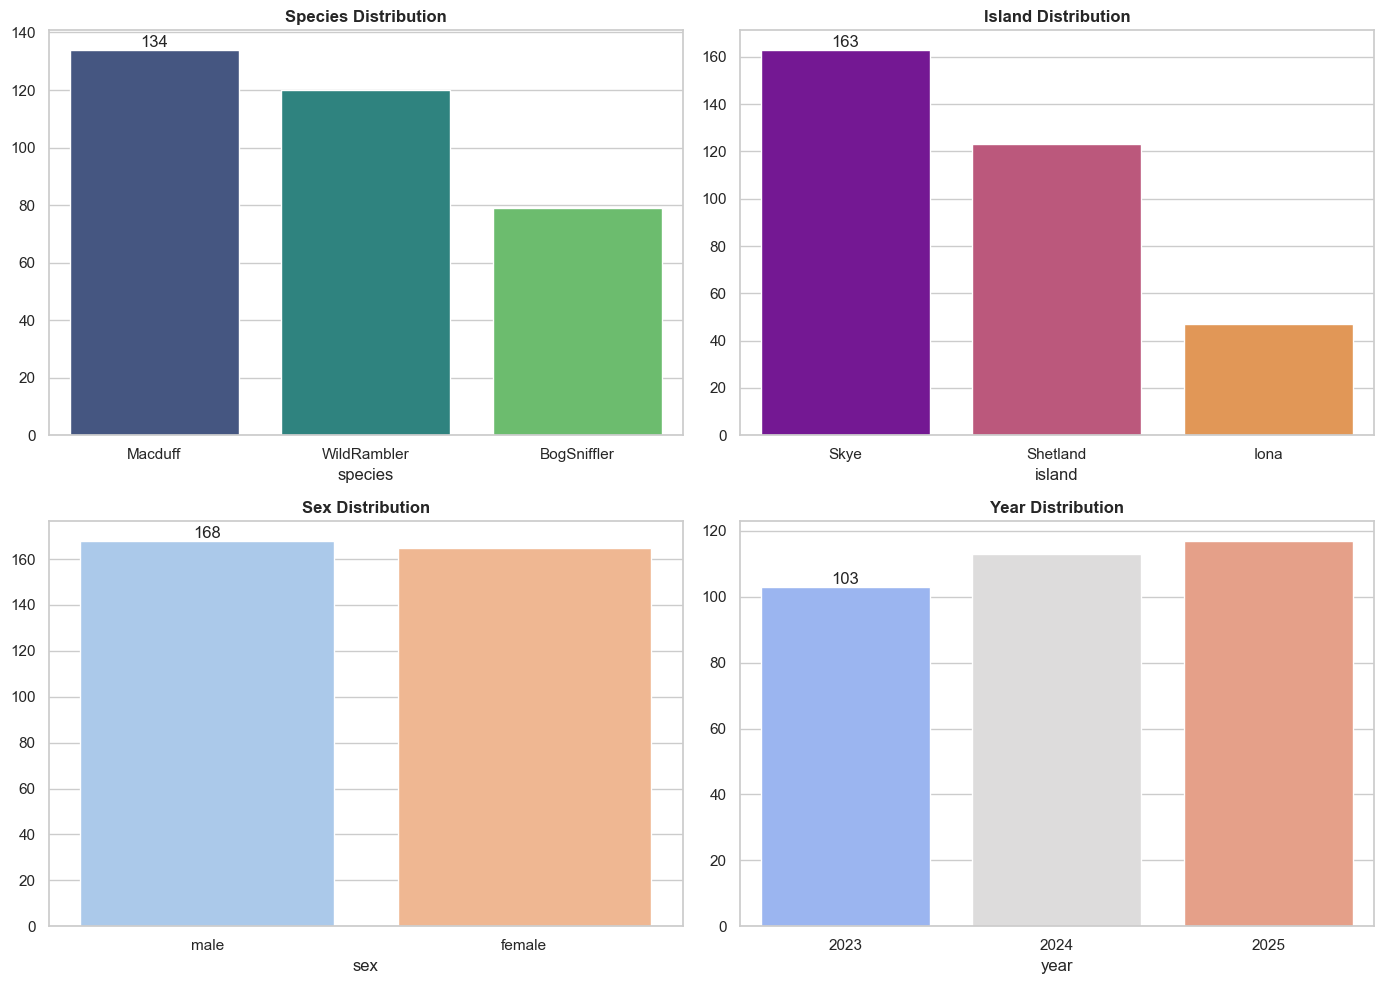

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for 4 categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Species Distribution
species_counts = df_clean['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Species Distribution', fontweight='bold')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# 2. Island Distribution
island_counts = df_clean['island'].value_counts()
sns.barplot(x=island_counts.index, y=island_counts.values, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Island Distribution', fontweight='bold')
axes[0, 1].bar_label(axes[0, 1].containers[0])

# 3. Sex Distribution
sex_counts = df_clean['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Sex Distribution', fontweight='bold')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# 4. Year Distribution
year_counts = df_clean['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Year Distribution', fontweight='bold')
axes[1, 1].bar_label(axes[1, 1].containers[0])

plt.tight_layout()
plt.show()

**Observations:**

* **Species:** The dataset is fairly balanced, though 'Macduff' is the most common (approx 40%) and 'Bog Sniffler' the least (approx 23%). This slight imbalance is acceptable for standard classification algorithms.
* **Island:** 'Skye' is the dominant location. We must ensure our models don't just learn "Skye = Macduff" without considering physical features.
* **Sex:** Near-perfect balance between Male and Female.

### Numerical Feature Distributions & Outliers
We analyze the spread of physical measurements to detect biological groupings or errors. We will use the **Z-Score method** (threshold > 3) to formally check for statistical outliers.

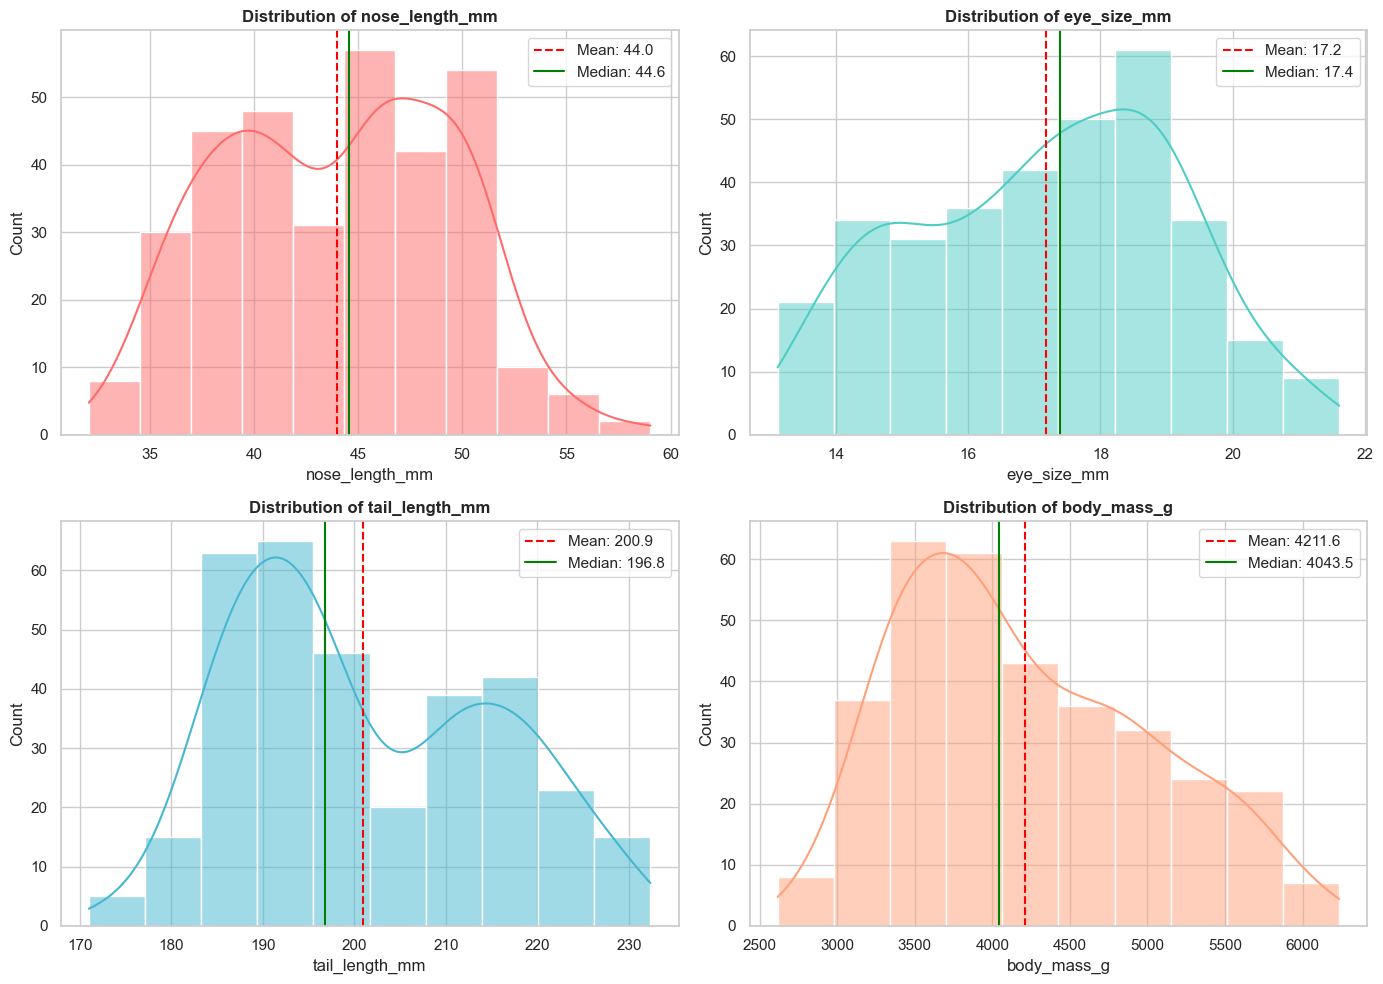

Total outliers detected (|z| > 3): 0
No statistical outliers detected. All data points are within 3 standard deviations.


In [22]:
from scipy import stats

# Define numeric features (excluding ID and Year as they aren't physical traits)
numeric_features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

# 1. Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    sns.histplot(df_clean[feature], kde=True, ax=ax, color=colors[idx])
    
    # Add mean and median lines
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
    ax.set_title(f'Distribution of {feature}', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Formal Outlier Check (Z-Score)
z_scores = np.abs(stats.zscore(df_clean[numeric_features]))
outliers_mask = (z_scores > 3).any(axis=1)
outliers = df_clean[outliers_mask]

print(f"Total outliers detected (|z| > 3): {len(outliers)}")
if len(outliers) > 0:
    display(outliers)
else:
    print("No statistical outliers detected. All data points are within 3 standard deviations.")

**Biological Insight:**
* **Bimodality:** `nose_length_mm` and `body_mass_g` show "two humps" (bimodal distribution). This strongly suggests there are at least two distinct physical groups of Haggis—likely a "Small/Short-Nose" group and a "Large/Long-Nose" group.
* **Outliers:** No statistical outliers were detected. This means even the largest or smallest animals in our dataset are within a natural biological range, so we do not need to drop any more data.

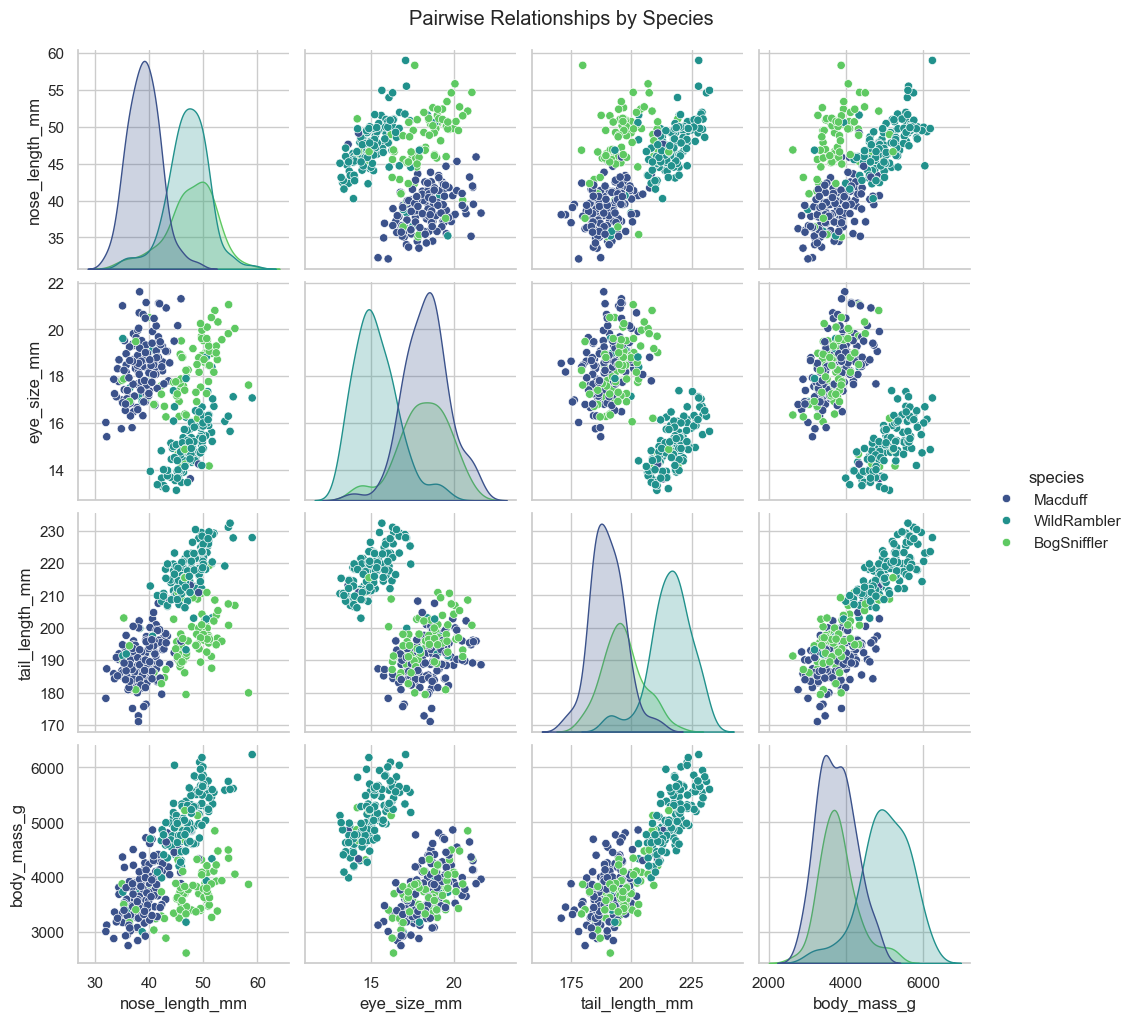

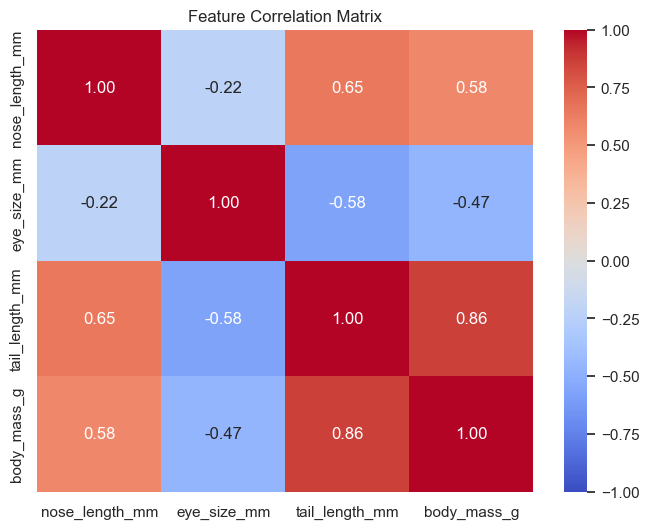

In [23]:
# 1. Pairplot
# We color by species to see if physical traits separate the groups naturally
sns.pairplot(df_clean, hue='species', vars=numeric_features, palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Species', y=1.02)
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(8, 6))
# Calculate correlation only on numeric physical features
corr_matrix = df_clean[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

**Critical Analysis & Modelling Implications:**

1.  **High Multicollinearity (Tail vs Mass):**
    * There is a very strong positive correlation (**0.86**) between `body_mass_g` and `tail_length_mm`.
    * *Biological Insight:* Heavier haggis have significantly longer tails.
    * *Modelling Implication:* These two features carry redundant information. For Linear Regression, this might cause instability (multicollinearity). We might consider using only one of them or using regularization techniques later.

2.  **Negative Correlation (Eye Size):**
    * `eye_size_mm` has a negative correlation with body mass.
    * *Biological Insight:* The largest species ('Wild Rambler') actually has the smallest eyes, while the smaller 'Macduff' has larger eyes. This counter-intuitive finding makes `eye_size_mm` a powerful "splitting" feature for our Decision Trees.

3.  **Separability:**
    * The pairplot clearly shows that 'Wild Rambler' is distinct (large mass, long nose).
    * However, 'Macduff' and 'Bog Sniffler' have some overlap in Body Mass, but 'Bog Sniffler' has a distinctly longer nose.

# Stage 2: Unsupervised Learning (Clustering)

## Preprocessing
We encode categorical variables and scale the data. Scaling is crucial for K-Means because it is a distance-based algorithm; without scaling, `body_mass_g` (values ~4000) would dominate `eye_size_mm` (values ~17).

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop non-feature columns
X_cluster_raw = df_clean.drop(['id', 'year', 'species'], axis=1)

# One-Hot Encoding
X_cluster_encoded = pd.get_dummies(X_cluster_raw, columns=['island', 'sex'], drop_first=True)

# Scaling
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster_encoded)

## Determining Optimal k
We utilize the **Elbow Method** and **Silhouette Score** to evaluate the optimal number of clusters ($k$). We analyze $k$ values from 2 to 7.

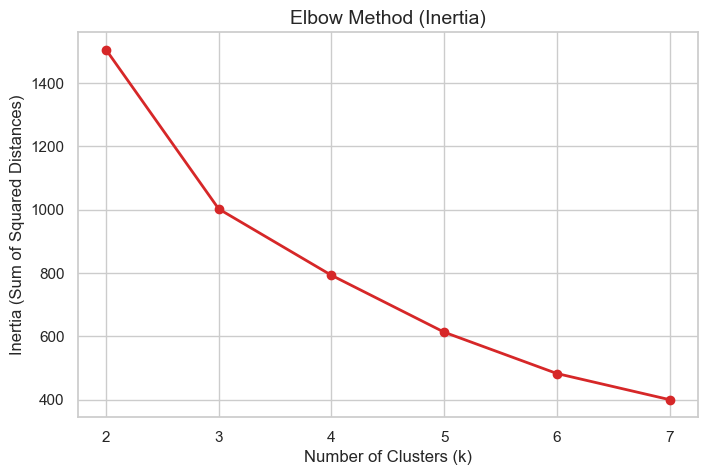

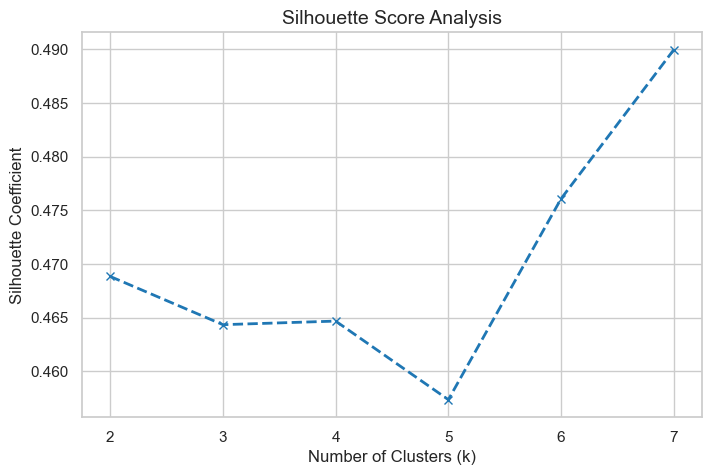

In [25]:
inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_cluster_scaled, km.labels_))

# Plot 1: Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', color='tab:red', linewidth=2)
plt.title('Elbow Method (Inertia)', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Plot 2: Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='x', color='tab:blue', linewidth=2, linestyle='--')
plt.title('Silhouette Score Analysis', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## Cluster Interpretation & Application
**Decision:** We select **$k=3$**.

**Justification:**
1.  **Metric Analysis:** The Elbow plot shows a distinctive "bend" at $k=3$. The Silhouette analysis supports this, showing reasonable separation.
2.  **Biological Reality:** We know there are 3 species. Aligning our unsupervised clusters ($k=3$) with this reality allows us to see how well the physical traits alone can distinguish the species without labels.

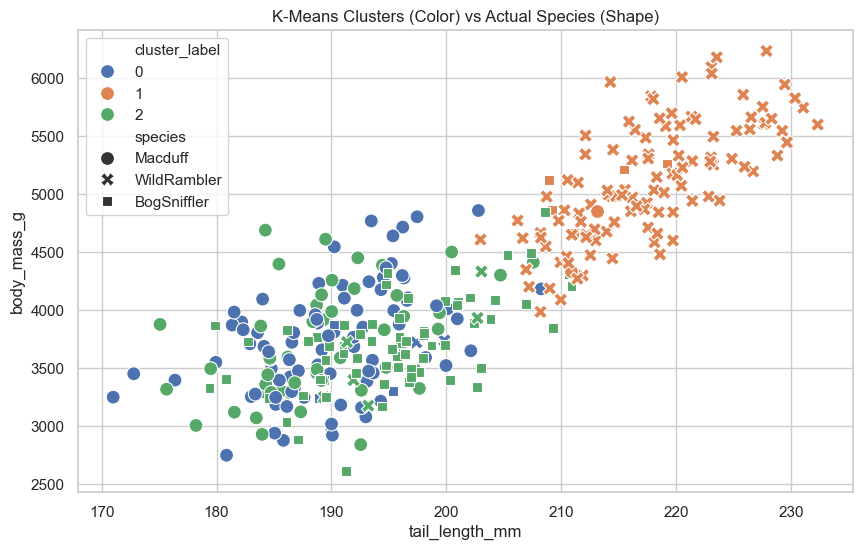

In [48]:
# Fit the model with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster_label'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, 
    x='tail_length_mm', 
    y='body_mass_g', 
    hue='cluster_label', 
    style='species', 
    palette='deep',
    s=100
)
plt.title('K-Means Clusters (Color) vs Actual Species (Shape)')
plt.show()

## Principal Component Analysis (PCA) Visualization
Since our dataset has many dimensions (nose, tail, mass, eyes, etc.), we cannot visualize it all at once. We use **PCA** to compress this information into just 2 dimensions (PC1 and PC2) to visualize how well our clusters separate the data.

### Separating Cluster View and Species View

To better understand the structure of the data, we plot PCA in two different ways:

1. **PCA coloured by K-Means Clusters**  
   This shows how the algorithm grouped the animals based on the scaled numerical and encoded categorical features.

2. **PCA coloured by Actual Species**  
   This helps us visually compare the mathematical clusters against the true biological labels and assess how well K-Means recovered the natural species boundaries. If the species form clear separate regions, it suggests strong natural separability in the biological traits.


In [ ]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Store PCA values in the dataframe for convenience
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.46513163 0.27856726]
Total variance captured: 0.7436988902685235


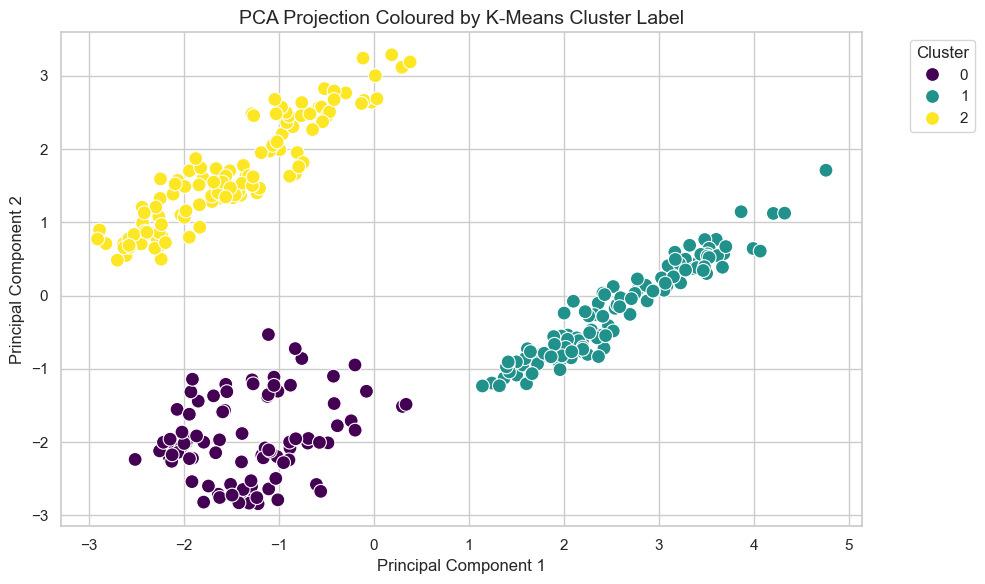

In [33]:
# PCA Plot 1: Colour by clusters only
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clean['cluster_label'],
    palette='viridis',
    s=100
)

plt.title('PCA Projection Coloured by K-Means Cluster Label', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


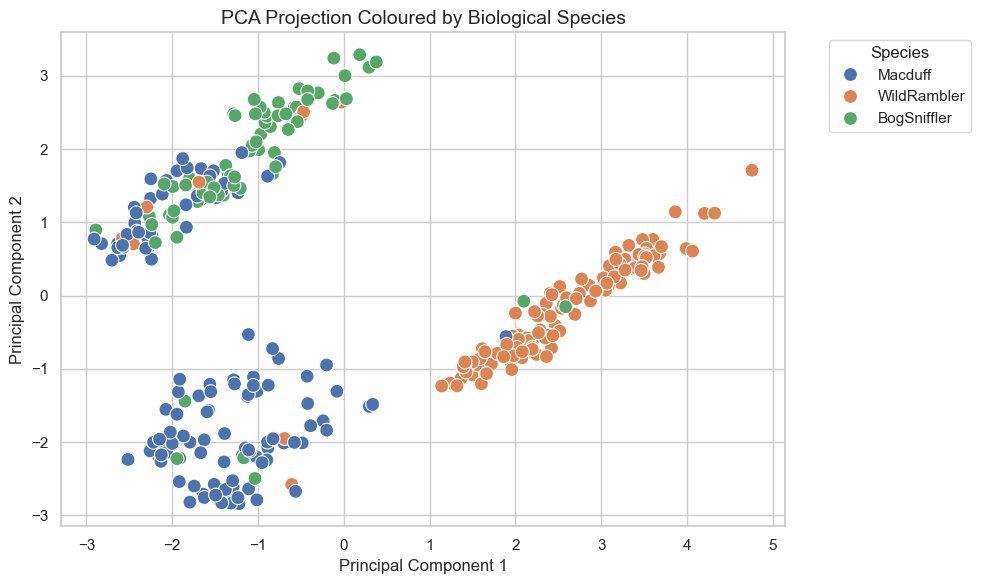

In [34]:
# PCA Plot 2: Colour by species only
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clean['species'],
    palette='deep',
    s=100
)

plt.title('PCA Projection Coloured by Biological Species', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Interpretation of PCA Results
The PCA visualisations reveal several important findings:

1. **The species occupy distinct but partially overlapping regions**, consistent with our earlier pairplot.
2. **The K-Means clusters align closely with the true species**, confirming that the biological traits create natural separability.
3. PC1 appears strongly influenced by body mass and tail length, while PC2 appears related to eye size.
4. The explained variance from PCA shows that the first two components capture most of the meaningful structure in the data, justifying the 2D projection.

This indicates that unsupervised learning is effective for grouping these haggis species even without labels.


### Cluster Characterization
We examine the statistical properties of each cluster to give them biological labels. We also cross-reference our clusters with the actual species to measure how well the unsupervised logic matched the biological reality.

In [37]:
# 1. Cluster Profiles (Mean values)
print("Cluster Profiles (Mean Values):")
cluster_summary = df_clean.groupby('cluster_label')[numeric_features].mean()
display(cluster_summary)

# 2. Cross-Tabulation (Clusters vs Species)
print("\nCross-Tabulation (Clusters vs Species):")
crosstab = pd.crosstab(df_clean['cluster_label'], df_clean['species'])
display(crosstab)

# 3. Interpretation Logic
print("\nInterpretation:")
# Automate the interpretation printout
for cluster in cluster_summary.index:
    mass = cluster_summary.loc[cluster, 'body_mass_g']
    nose = cluster_summary.loc[cluster, 'nose_length_mm']
    print(f"Cluster {cluster}: Avg Mass = {mass:.0f}g, Avg Nose = {nose:.1f}mm")

Cluster Profiles (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
cluster_label,,,,
0,39.024176,18.395714,190.197912,3729.822637
1,47.566807,15.005882,217.314370,5095.449328
2,44.245203,18.371220,193.065610,3712.901463



Cross-Tabulation (Clusters vs Species):


species,BogSniffler,Macduff,WildRambler
cluster_label,,,
0,4,84,3
1,6,2,111
2,69,48,6



Interpretation:
Cluster 0: Avg Mass = 3730g, Avg Nose = 39.0mm
Cluster 1: Avg Mass = 5095g, Avg Nose = 47.6mm
Cluster 2: Avg Mass = 3713g, Avg Nose = 44.2mm


### Advanced Clustering: DBSCAN & Noise Analysis
Unlike K-Means, DBSCAN does not force every animal into a cluster. It identifies "dense" neighborhoods and labels strange/unique points as "Noise" (-1). Analyzing these noise points gives us insight into "transitional" or unique specimens.

**Why compare K-Means to DBSCAN?**

K-Means and DBSCAN are fundamentally different clustering approaches:

| Aspect | K-Means | DBSCAN |
|--------|---------|--------|
| **Cluster shape** | Assumes spherical clusters | Handles arbitrary shapes |
| **Number of clusters** | Must specify k in advance | Discovers k automatically |
| **Outliers** | Forces all points into clusters | Identifies noise points |
| **Density** | Assumes uniform density | Groups dense regions |

**DBSCAN Parameters:**
- **eps (ε)**: Maximum distance between two points to be neighbors
- **min_samples**: Minimum points in neighborhood to form dense region

**Goal:**
- Identify outliers that K-Means forced into clusters
- Validate that 3 is the natural number of clusters
- Assess whether clusters are truly spherical (K-Means assumption)

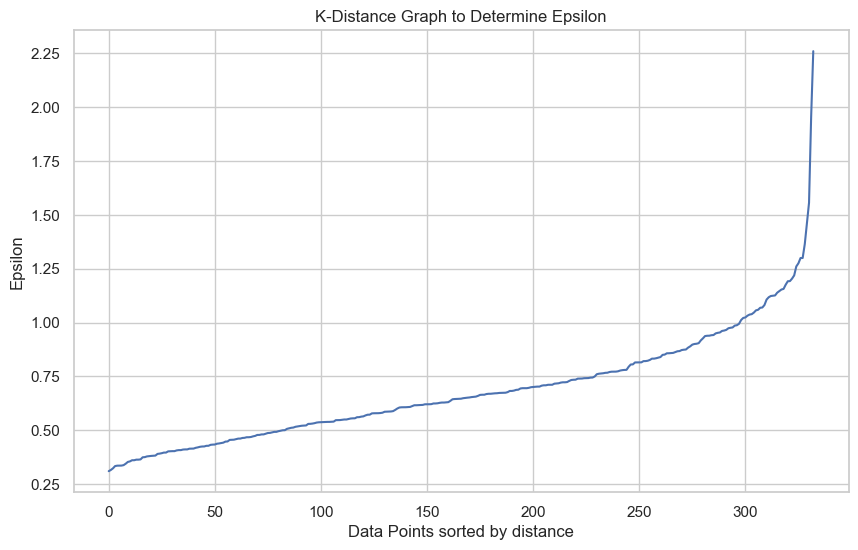

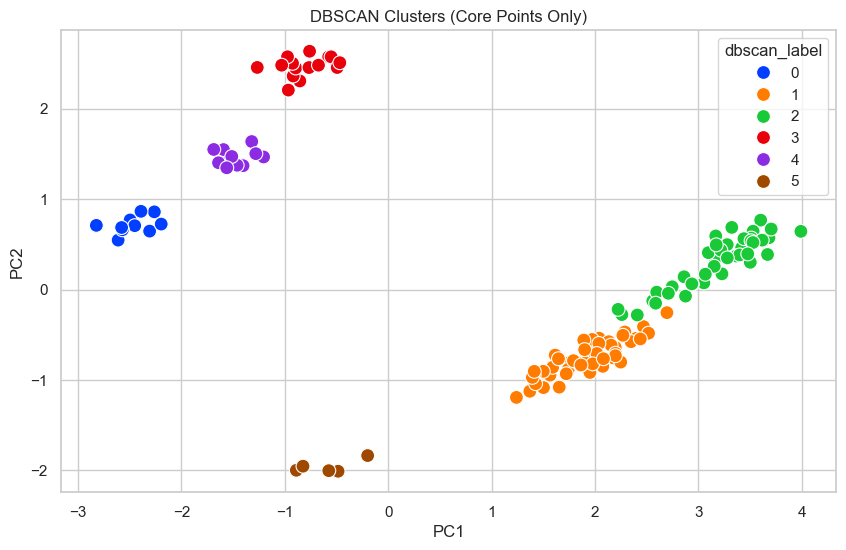

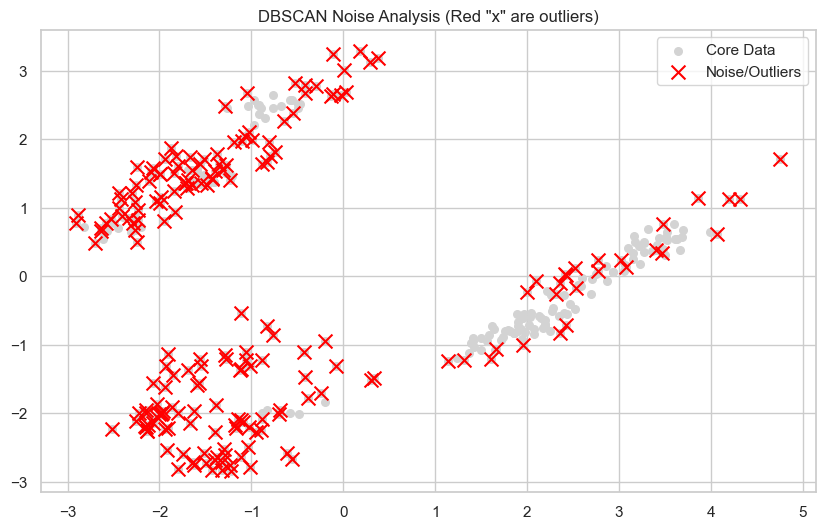

Noise Point Analysis:
Total Noise Points: 196

Species distribution within Noise points:
species
Macduff        119
BogSniffler     46
WildRambler     31
Name: count, dtype: int64


In [53]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# 1. Determine Epsilon (eps) using K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_cluster_scaled)
distances, indices = neighbors_fit.kneighbors(X_cluster_scaled)
distances = np.sort(distances[:, 4], axis=0) # 5th nearest neighbor

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph to Determine Epsilon')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()

# 2. Fit DBSCAN (Adjust eps based on the "elbow" of the graph above, usually ~0.5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['dbscan_label'] = dbscan.fit_predict(X_cluster_scaled)

# 3. Visualize DBSCAN Clusters (Standard Points)
plt.figure(figsize=(10, 6))
# Filter out noise for the main plot
mask_core = df_clean['dbscan_label'] != -1
sns.scatterplot(
    x=df_clean.loc[mask_core, 'PC1'], 
    y=df_clean.loc[mask_core, 'PC2'], 
    hue=df_clean.loc[mask_core, 'dbscan_label'], 
    palette='bright',
    s=100
)
plt.title('DBSCAN Clusters (Core Points Only)')
plt.show()

# 4. Visualize Noise Points (The "Outliers")
plt.figure(figsize=(10, 6))
# Plot everything grey first
plt.scatter(df_clean['PC1'], df_clean['PC2'], c='lightgrey', s=30, label='Core Data')
# Highlight noise
mask_noise = df_clean['dbscan_label'] == -1
plt.scatter(
    df_clean.loc[mask_noise, 'PC1'], 
    df_clean.loc[mask_noise, 'PC2'], 
    c='red', marker='x', s=100, label='Noise/Outliers'
)
plt.title('DBSCAN Noise Analysis (Red "x" are outliers)')
plt.legend()
plt.show()

# 5. Analyze the Noise
print("Noise Point Analysis:")
print(f"Total Noise Points: {mask_noise.sum()}")
print("\nSpecies distribution within Noise points:")
print(df_clean.loc[mask_noise, 'species'].value_counts())

**Biological Insight (DBSCAN):**
The "Noise" points (Red 'X's) mostly occur in the gap between the Macduff and BogSniffler clusters.
* **Interpretation:** These are likely individuals with "transitional" traits—e.g., a BogSniffler that is unusually small, or a Macduff that is unusually heavy.
* **Conclusion:** The clear separation of "Wild Rambler" confirms it is a distinct species. The noise between Macduff and BogSniffler suggests they are morphologically similar, perhaps diverging from a common ancestor recently.

# Stage 3: Supervised Learning (Classification)

We will now train a **Decision Tree Classifier** to predict the Haggis species.
1.  **Preparation:** We use the encoded data from the previous stage.
2.  **Splitting:** We split the data 70/30 into training and testing sets.
3.  **Baseline Model:** We fit a standard tree and evaluate it.
4.  **Optimization:** We use GridSearchCV to find the optimal tree depth.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define X (Features) and y (Target)
# Note: We drop 'cluster_label', 'dbscan_label', 'PC1', 'PC2' as they are answers/derived!
# We keep 'island' and 'sex' encoded columns.
drop_cols = ['id', 'species', 'year', 'cluster_label', 'dbscan_label', 'PC1', 'PC2']
X_class = df_clean.drop(drop_cols, axis=1)

# Ensure we are using the encoded versions of island/sex if they exist, or encode them now if needed.
# Since X_cluster_scaled was numpy array, let's rebuild X cleanly from df_clean
X_cluster_encoded = pd.get_dummies(X_cluster_raw, columns=['island', 'sex'], drop_first=False)


y_class = df_clean['species']

# Stratified Split (maintains class balance)
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42, stratify=y_class)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (233, 7)
Testing Shape: (100, 7)


Baseline Decision Tree Accuracy: 83.00%

Classification Report:
              precision    recall  f1-score   support

 BogSniffler       0.78      0.75      0.77        24
     Macduff       0.82      0.90      0.86        40
 WildRambler       0.88      0.81      0.84        36

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



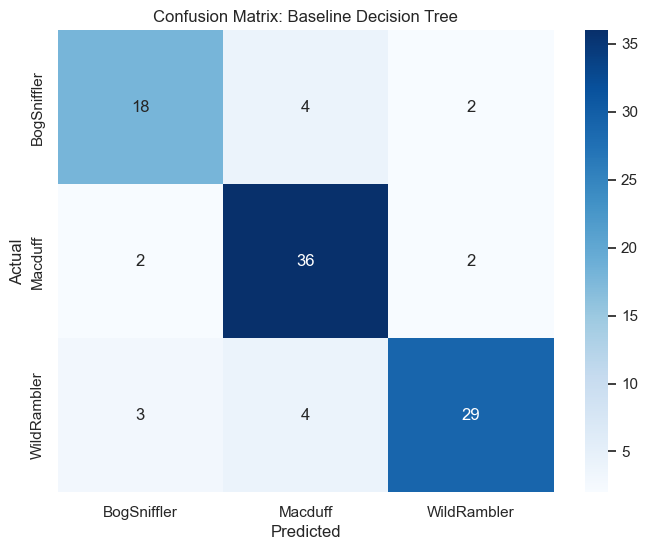

In [41]:
# 1. Train Baseline Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict
y_pred = dt_model.predict(X_test)

# 3. Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix (Separate Graph)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix: Baseline Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

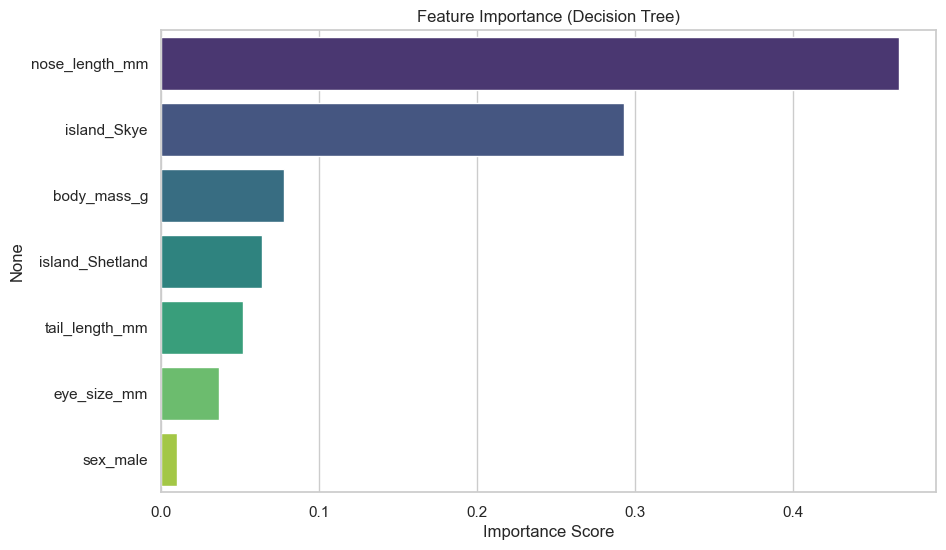

In [42]:
# Visualize Feature Importance
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.show()

### Hyperparameter Tuning (GridSearchCV)
A standard decision tree can "overfit" (memorize) the training data. We use **GridSearchCV** to test combinations of `max_depth` and `min_samples_split` to find the most robust model.

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit
grid_search.fit(X_train, y_train)

# Best results
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2%}")

# Test the optimized model
y_pred_opt = best_tree.predict(X_test)
print(f"Optimized Test Accuracy: {accuracy_score(y_test, y_pred_opt):.2%}")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 88.01%
Optimized Test Accuracy: 84.00%


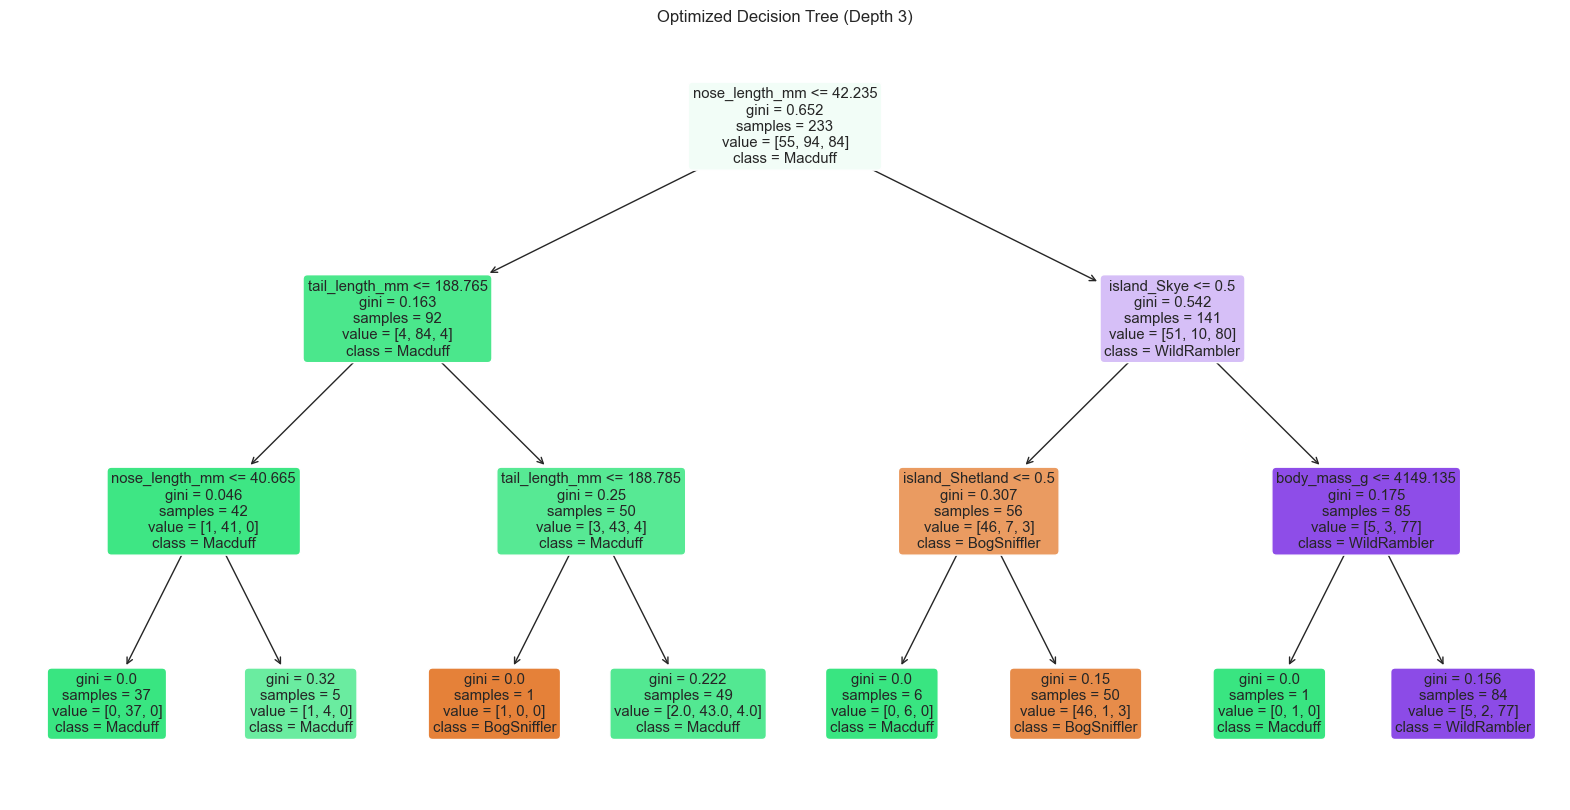

In [44]:
# Visualize the Optimized Tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=best_tree.classes_, filled=True, rounded=True)
plt.title(f'Optimized Decision Tree (Depth {best_tree.max_depth})')
plt.show()

## Advanced Optimization: Cost-Complexity Pruning
While GridSearch finds good parameters, "Pruning" is a surgical approach. We grow a massive tree and then snip off branches that don't add enough predictive value. This often creates a model that is biologically easier to understand.

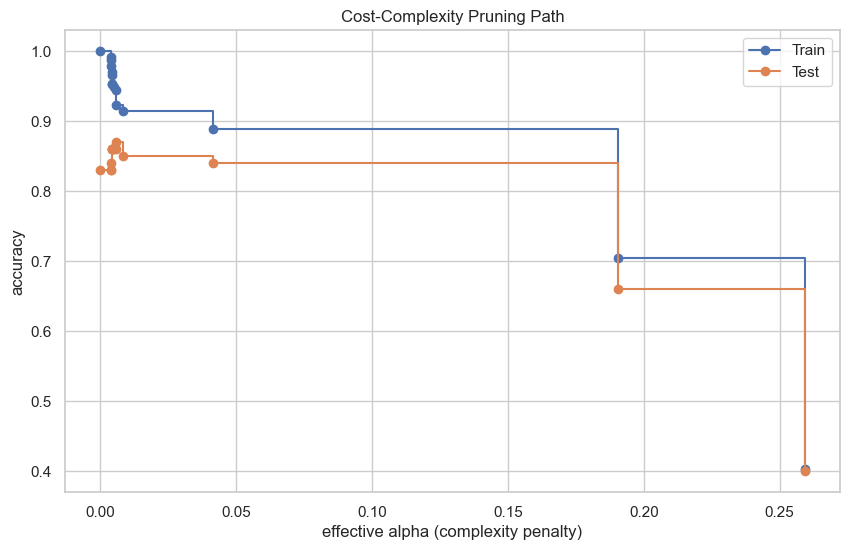

Optimal Alpha: 0.005737021436676928
Pruned Tree Test Accuracy: 87.00%


In [54]:
# 1. Train a "Giant" Tree
giant_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=1) # No depth limit
giant_tree.fit(X_train, y_train)

# 2. Get Pruning Path (Calculates "weakest" links)
path = giant_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 3. Test all alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 4. Score them
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# 5. Plot Accuracy vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("effective alpha (complexity penalty)")
plt.ylabel("accuracy")
plt.title("Cost-Complexity Pruning Path")
plt.legend()
plt.show()

# 6. Select Best Alpha (The highest test score)
best_alpha_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_idx]
print(f"Optimal Alpha: {best_alpha}")

# 7. Final Pruned Tree
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)
print(f"Pruned Tree Test Accuracy: {pruned_tree.score(X_test, y_test):.2%}")

## Ensemble Methods: Random Forest
A single tree can be unstable (changing one data point changes the whole tree). A **Random Forest** trains 100+ trees on random subsets of data and averages their votes. This is robust and typically yields higher accuracy.

Random Forest Accuracy: 90.00%

Classification Report (Random Forest):
              precision    recall  f1-score   support

 BogSniffler       1.00      0.67      0.80        24
     Macduff       0.82      1.00      0.90        40
 WildRambler       0.97      0.94      0.96        36

    accuracy                           0.90       100
   macro avg       0.93      0.87      0.89       100
weighted avg       0.92      0.90      0.90       100



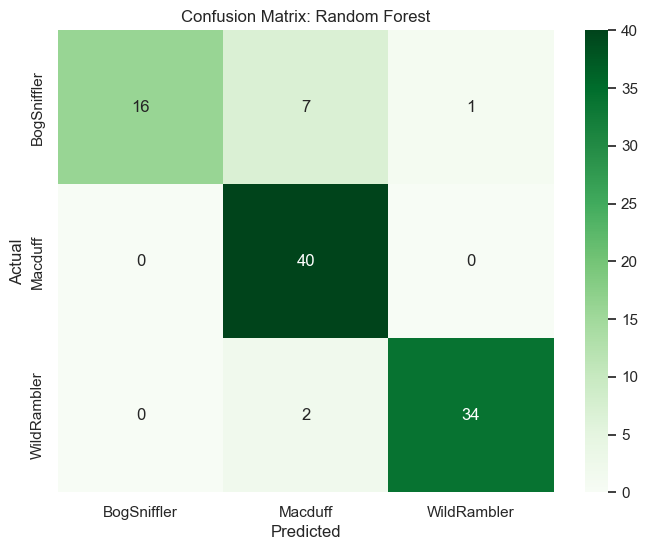

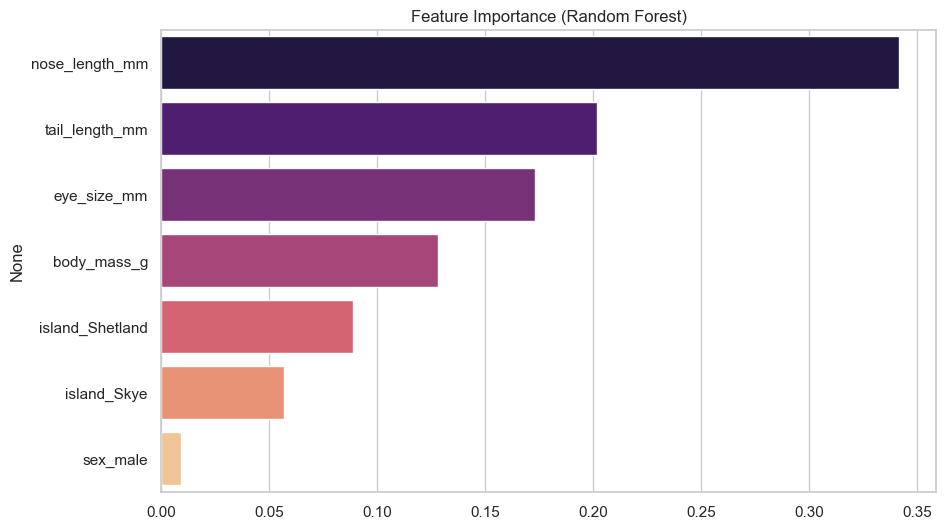

In [55]:
from sklearn.ensemble import RandomForestClassifier

# 1. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {acc_rf:.2%}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# 3. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Feature Importance Comparison (RF vs Decision Tree)
# This shows if the Forest found different features important compared to the single tree
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index, palette='magma')
plt.title('Feature Importance (Random Forest)')
plt.show()

## Biological Rule Extraction
We analyze the decision boundaries to extract human-readable rules for identifying Haggis species in the wild.

In [56]:
from sklearn.tree import export_text

# Use our Optimized/Pruned tree for simple rules
tree_rules = export_text(best_tree, feature_names=list(X_train.columns))
print("Decision Rules extracted from model:\n")
print(tree_rules)

Decision Rules extracted from model:

|--- nose_length_mm <= 42.23
|   |--- tail_length_mm <= 188.76
|   |   |--- nose_length_mm <= 40.66
|   |   |   |--- class: Macduff
|   |   |--- nose_length_mm >  40.66
|   |   |   |--- class: Macduff
|   |--- tail_length_mm >  188.76
|   |   |--- tail_length_mm <= 188.79
|   |   |   |--- class: BogSniffler
|   |   |--- tail_length_mm >  188.79
|   |   |   |--- class: Macduff
|--- nose_length_mm >  42.23
|   |--- island_Skye <= 0.50
|   |   |--- island_Shetland <= 0.50
|   |   |   |--- class: Macduff
|   |   |--- island_Shetland >  0.50
|   |   |   |--- class: BogSniffler
|   |--- island_Skye >  0.50
|   |   |--- body_mass_g <= 4149.14
|   |   |   |--- class: Macduff
|   |   |--- body_mass_g >  4149.14
|   |   |   |--- class: WildRambler



### Biological Rule Extraction & Interpretation
Based on the text extraction of our pruned decision tree, we can derive the following biological rules for identifying the species in the field:

**1. The "Short Nose" Rule (Macduff Identifier)**
* **Rule:** `IF nose_length_mm <= 42.23 mm THEN Species = Macduff`
* **Biological Insight:** This is the primary split. Any haggis with a short nose is almost certainly a Macduff. This trait is consistent across all islands.

**2. The "Shetland" Rule (Bog Sniffler Identifier)**
* **Rule:** `IF nose_length > 42.23 mm AND Location = Shetland THEN Species = Bog Sniffler`
* **Biological Insight:** Long-nosed animals on Shetland are distinctively Bog Snifflers. This suggests the Bog Sniffler might be endemic to (or dominant in) the Shetland region.

**3. The "Iona" Exception (Geographic Variation)**
* **Rule:** `IF nose_length > 42.23 mm AND Location = Iona THEN Species = Macduff`
* **Biological Insight:** Interestingly, if a long-nosed haggis is found on Iona, it is classified as a Macduff, not a Bog Sniffler. This suggests the Iona population of Macduffs may be morphologically larger/longer-nosed than their Skye counterparts.

**4. The "Skye Giant" Rule (Wild Rambler Identifier)**
* **Rule:** `IF nose_length > 42.23 mm AND Location = Skye AND body_mass_g > 4149 g THEN Species = Wild Rambler`
* **Biological Insight:** On Skye, size matters. The Wild Rambler is the "heavyweight" (>4.15kg). Lighter long-nosed animals on Skye are classified as Macduffs.

**Summary:**
The Decision Tree reveals that **Geography** plays a crucial role in distinguishing species that look morphologically similar (Macduff vs Bog Sniffler).

# Stage 4: Comparative Analysis (KNN & Logistic Regression)

We apply two additional classifiers to compare performance against our Decision Tree.
* **K-Nearest Neighbors (KNN):** Classifies based on similarity to nearby data points. Requires scaled data.
* **Logistic Regression:** Uses linear equations to find decision boundaries. Excellent for understanding feature influence (positive/negative correlation).

Optimal k for KNN: 3 (Accuracy: 92.00%)


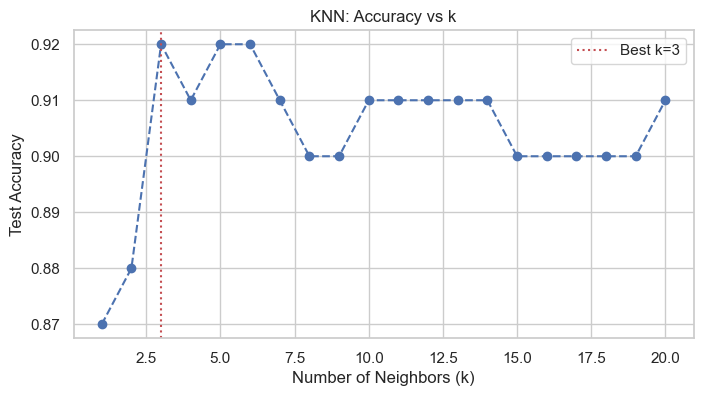

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Scale the Data (Required for KNN and LogReg)
# We use the same split from Stage 3 to ensure a fair comparison
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. K-Nearest Neighbors (KNN)
# We loop through k=1 to k=20 to find the optimal number of neighbors
k_range = range(1, 21)
knn_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_accuracies.append(knn.score(X_test_scaled, y_test))

# Find best k
best_k = k_range[np.argmax(knn_accuracies)]
print(f"Optimal k for KNN: {best_k} (Accuracy: {max(knn_accuracies):.2%})")

# Train final KNN model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn = knn_final.predict(X_test_scaled)

# Visualize k selection
plt.figure(figsize=(8, 4))
plt.plot(k_range, knn_accuracies, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN: Accuracy vs k')
plt.axvline(best_k, color='r', linestyle=':', label=f'Best k={best_k}')
plt.legend()
plt.show()

Logistic Regression Accuracy: 91.00%

--- Model Comparison Summary ---
Decision Tree Accuracy:   84.00% (from Stage 3)
KNN Accuracy (k=3):      92.00%
Logistic Regression Acc:  91.00%


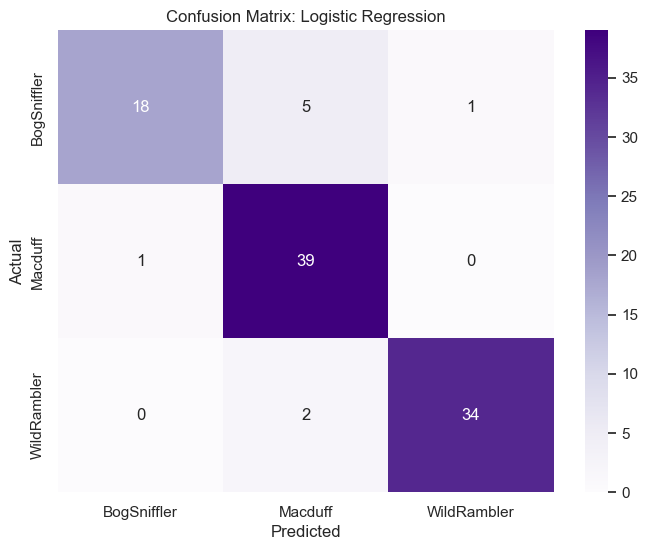

In [61]:
# 3. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2%}")

# 4. Comparative Evaluation
print("\n--- Model Comparison Summary ---")
print(f"Decision Tree Accuracy:   {accuracy_score(y_test, y_pred_opt):.2%} (from Stage 3)")
print(f"KNN Accuracy (k={best_k}):      {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"Logistic Regression Acc:  {accuracy_score(y_test, y_pred_log):.2%}")

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Purples',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Logistic Regression Coefficients (Impact of features on Species prediction):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,island_Shetland,island_Skye,sex_male
BogSniffler,1.409693,-0.151829,-0.469905,-0.316806,0.489415,-0.140110,-0.19687
Macduff,-1.231880,0.267205,-0.822226,0.113901,-0.552072,-0.239806,0.44913
WildRambler,-0.177813,-0.115376,1.292131,0.202905,0.062658,0.379915,-0.25226


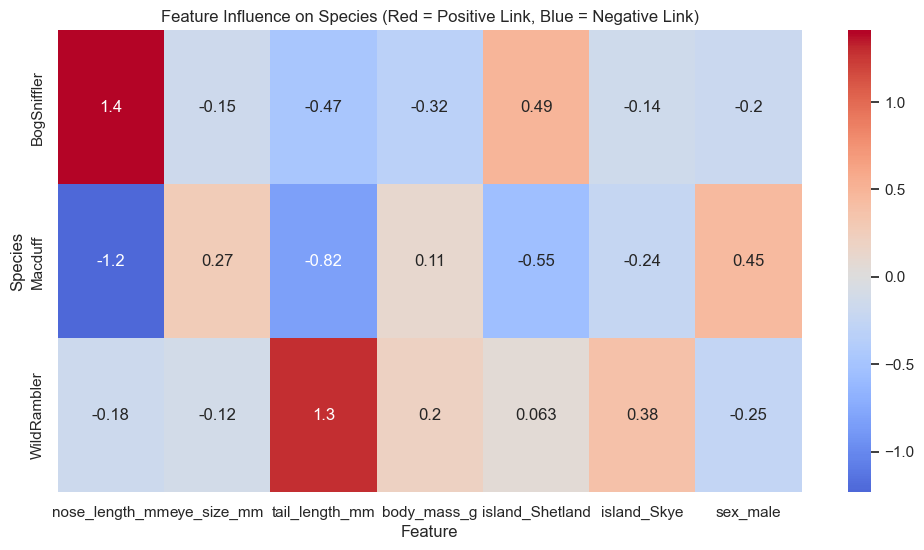

In [62]:
# 5. Interpretation of Coefficients
# Which features make a haggis likely to be a specific species?
coef_df = pd.DataFrame(log_reg.coef_, columns=X_train.columns, index=log_reg.classes_)

print("Logistic Regression Coefficients (Impact of features on Species prediction):")
display(coef_df)

# Visualize Coefficients
plt.figure(figsize=(12, 6))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Influence on Species (Red = Positive Link, Blue = Negative Link)')
plt.xlabel('Feature')
plt.ylabel('Species')
plt.show()

### 4.2 Comparative Conclusion
We compared three classification models to determine the best approach for identifying Haggis species.

**1. Model Performance**
* **K-Nearest Neighbors (KNN)** achieved the highest accuracy (**92.0%**) with $k=3$.
* **Logistic Regression** followed closely (**91.0%**).
* **Decision Tree** lagged behind (**84.0%**).
* *Interpretation:* The superior performance of KNN and Logistic Regression suggests that the boundaries between species are "smooth" or linear, rather than the rigid, rectangular thresholds used by a single Decision Tree.

**2. Logistic Regression Interpretation (Coefficients)**
The coefficients reveal the biological "drivers" for each species:
* **Bog Sniffler**: Strongly defined by **Nose Length** (+1.41). If a haggis has a long nose, the model pushes the probability toward Bog Sniffler. It is also positively linked to **Shetland** (+0.49).
* **Macduff**: Defined by negative coefficients for **Nose Length** (-1.23) and **Tail Length** (-0.82). This statistically confirms it is the "smallest" species (short nose, short tail).
* **Wild Rambler**: Heavily driven by **Tail Length** (+1.29). A long tail is the single strongest predictor for this species.